# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_true, Length: 23699, dtype: bool


In [19]:
print(data.iloc[0])
data.info()

total_images                             20
last_price                       13000000.0
total_area                            108.0
first_day_exposition    2019-03-07T00:00:00
rooms                                     3
ceiling_height                          2.7
floors_total                           16.0
living_area                            51.0
floor                                     8
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           25.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    18863.0
cityCenters_nearest                 16028.0
parks_around3000                        1.0
parks_nearest                         482.0
ponds_around3000                        2.0
ponds_nearest                         755.0
days_exposition                         NaN
is_true                         

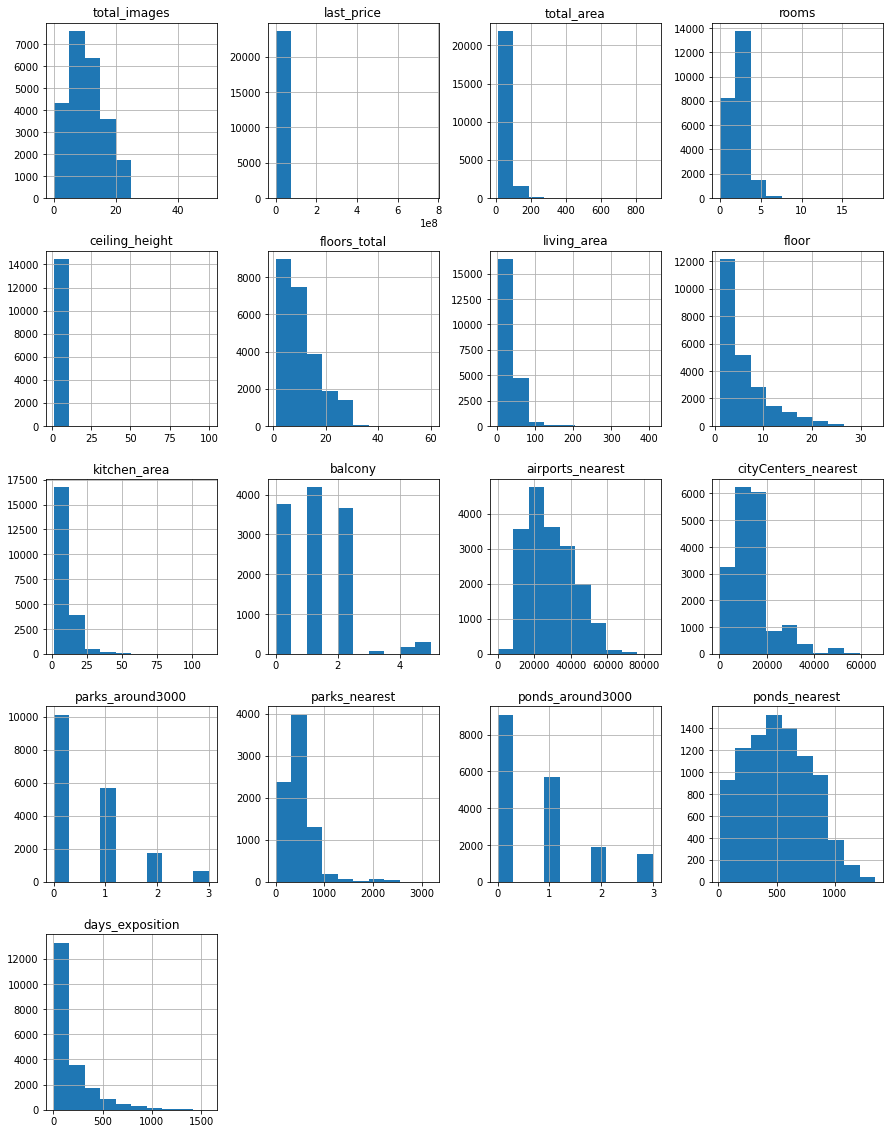

In [3]:
data.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-block alert-info">
Промежуточный вывод. Есть пропущенные значения, с которыми нужно что-то делать.

### Предобработка данных

In [4]:
data.head(1)
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [5]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data['floors_total'].fillna(data['floor'], inplace=True)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [7]:
data['floors_total'] = data['floors_total'].astype('int')

In [8]:
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [9]:
data.info()

data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'городской посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'коттеджный посёлок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный посёлок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции', 'посёлок станции')

data['locality_name'].sort_values().unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [41]:
print(data.describe())
print(data['ceiling_height'].quantile([.05, .95]))
print(data.query('(ceiling_height > 0) & (ceiling_height < 6.55)').count()/data['ceiling_height'].count())
print(data['ceiling_height'].mean() + data['ceiling_height'].std() * 3)
print(data['ceiling_height'].mean())
data['ceiling_height'][data['ceiling_height'] > 6.55] = 0
print(data.describe())

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.721051   
std        5.682529  1.088701e+07     35.654083      1.078405        0.304585   
min        0.000000  1.219000e+04     12.000000      0.000000        0.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.510000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000        6.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

/tmp/ipykernel_31/1162190799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'][data['ceiling_height'] > 6.55] = 0


<div class="alert alert-block alert-info">
В столбце ceiling_height максимальное значение 100, а это высота потолков и явно аномалия.

In [11]:
data[data.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<div class="alert alert-block alert-info">
Промежуточный вывод. Я изменил типы данных и заменил пропуски там, где возможно. Уcтранил неявные дубликаты в названиях населенных пунктов. Убрал аномалии. Проверил на явные дубликаты.

### Посчитайте и добавьте в таблицу новые столбцы

In [12]:
data['price_square_meter'] = data['last_price'] / data['total_area']
data['day_of_the_week'] = data['first_day_exposition'].dt.dayofweek
data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

def type_of_floor(row):
    if row['floor'] == row['floors_total']:
        return 'last'
    elif row['floor'] == 1:
        return 'first'
    else:
        return 'other'
data['type_of_floor'] = data.apply(type_of_floor, axis=1)
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype(int)

<div class="alert alert-block alert-info">
Промежуточный вывод. Добавил новые столбцы.

### Проведите исследовательский анализ данных

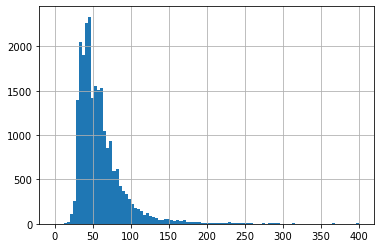

In [13]:
import matplotlib.pyplot as plt
data['total_area'].hist(bins=100,range = (0, 400))
plt.show()

<div class="alert alert-block alert-info">
Общая площадь колеблется, в основном, от 30 кв.м до 80 кв.м

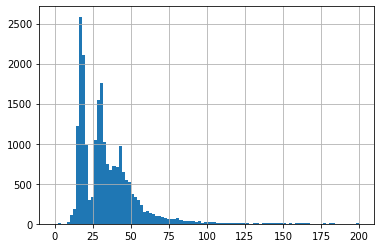

In [14]:
data['living_area'].hist(bins=100,range = (0, 200))
plt.show()

<div class="alert alert-block alert-info">
Жилая площадь колеблется, в основном, от 13 до 50 кв.м

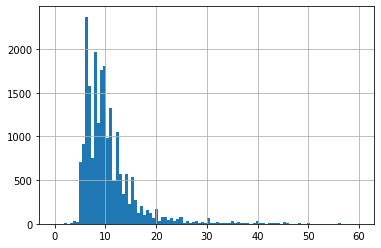

In [15]:
data['kitchen_area'].hist(bins=100,range = (0, 60))
plt.show()

<div class="alert alert-block alert-info">
Площадь кухни колеблется, в основном, от 5 до 15 кв.м

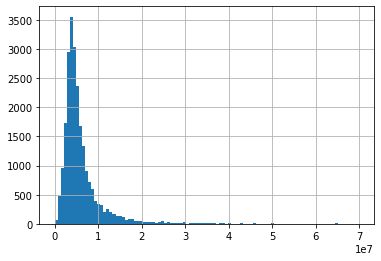

In [16]:
data['last_price'].hist(bins=100,range = (0, 70000000))
plt.show()

<div class="alert alert-block alert-info">
Цена колеблется, в основном, от 1 до 10 млн. руб.

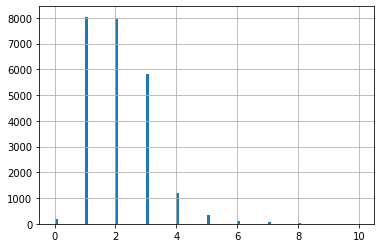

In [17]:
data['rooms'].hist(bins=100,range = (0, 10))
plt.show()

<div class="alert alert-block alert-info">
Число комнат, в основном, от 1 до 4.

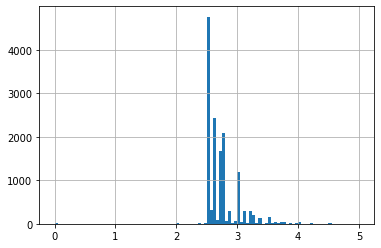

In [18]:
data['ceiling_height'].hist(bins=100,range = (0, 5))
plt.show()

<div class="alert alert-block alert-info">
Высота потолков от 2,5 до 3 м.

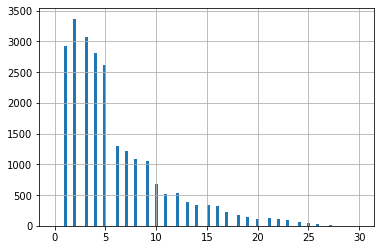

In [19]:
data['floor'].hist(bins=100,range = (0, 30))
plt.show()

<div class="alert alert-block alert-info">
Этажи, в основном, от 1 до 5.

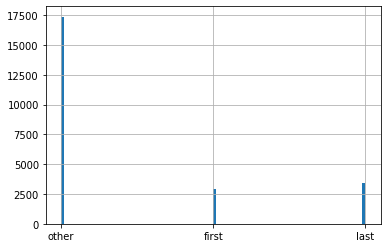

In [20]:
data['type_of_floor'].hist(bins=100)
plt.show()

<div class="alert alert-block alert-info">
Тип этажа, в основном, не первый и не последний.

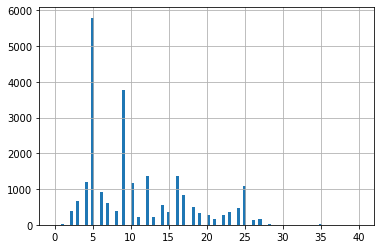

In [21]:
data['floors_total'].hist(bins=100,range = (0, 40))
plt.show()

<div class="alert alert-block alert-info">
Количество этажей в доме, в основном 5 и 9.

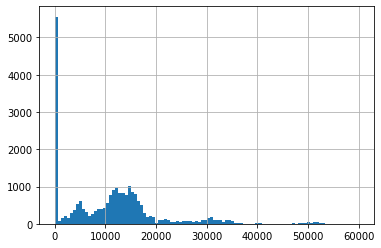

In [22]:
data['cityCenters_nearest'].hist(bins=100,range = (0, 60000))
plt.show()

<div class="alert alert-block alert-info">
Расстояние до центра города, в основном, 0 м.

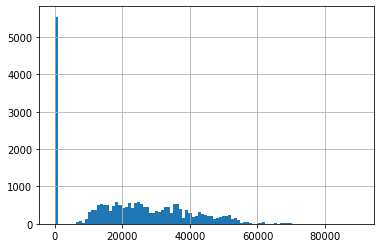

In [23]:
data['airports_nearest'].hist(bins=100,range = (0, 90000))
plt.show()

<div class="alert alert-block alert-info">
Расстояние до ближайшего аэропорта, в основном, от 10 до 40 км.

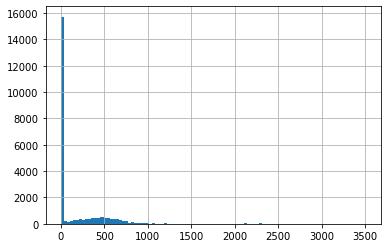

In [24]:
data['parks_nearest'].hist(bins=100,range = (0, 3500))
plt.show()

<div class="alert alert-block alert-info">
Расстояние до ближайшего парка, в основном, до 1 км.

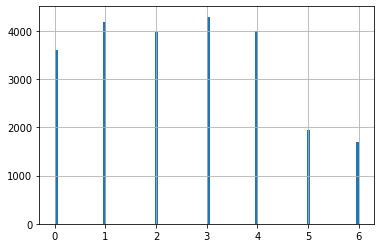

In [25]:
data['day_of_the_week'].hist(bins=100)
plt.show()

<div class="alert alert-block alert-info">
Объявления публикуются, в основном, по будням.

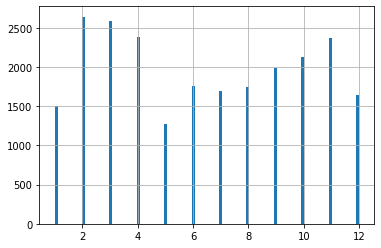

In [26]:
data['month_of_publication'].hist(bins=100)
plt.show()

<div class="alert alert-block alert-info">
В январе и мае объявления публикуются чуть реже, чем в остальные месяцы.

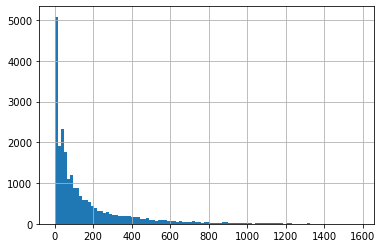

156.60884425503187
74.0


In [27]:
data['days_exposition'].hist(bins=100)
plt.show()
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

<div class="alert alert-block alert-info">
Продажа обычно занимает 95 дней. Если продажа занимает меньше 95 дней, то еёё можно считать быстрой, а больше 95 дней - долгой.

In [28]:
data['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [1]:
data.pivot_table(index='total_area', values='last_price').reset_index().plot.scatter(x='total_area', y='last_price')
plt.show()
print(data['total_area'].corr(data['last_price']))

NameError: name 'data' is not defined

<div class="alert alert-block alert-info">
Чем больше общая площадь, тем дороже квартира. Прямая зависимость.

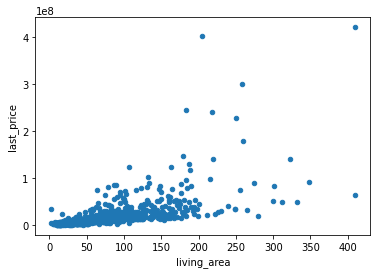

0.5664915336952651


In [30]:
data.pivot_table(index='living_area', values='last_price').reset_index().plot.scatter(x='living_area', y='last_price')
plt.show()
print(data['living_area'].corr(data['last_price']))

<div class="alert alert-block alert-info">
Чем больше жилая площадь, тем дороже квартира. Прямая зависимость.

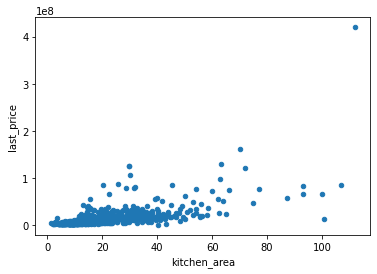

0.5198690130216392


In [31]:
data.pivot_table(index='kitchen_area', values='last_price').reset_index().plot.scatter(x='kitchen_area', y='last_price')
plt.show()
print(data['kitchen_area'].corr(data['last_price']))

<div class="alert alert-block alert-info">
Чем больше площадь кухни, тем дороже квартира. Прямая зависимость.

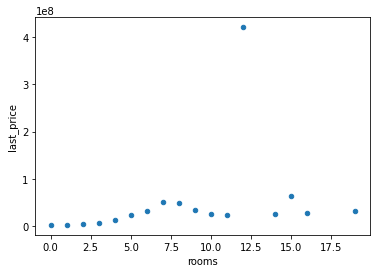

0.3633428499648948


In [32]:
data.pivot_table(index='rooms', values='last_price').reset_index().plot.scatter(x='rooms', y='last_price')
plt.show()
print(data['rooms'].corr(data['last_price']))

<div class="alert alert-block alert-info">
Чем больше комнат, тем дороже квартира. Прямая зависимость.

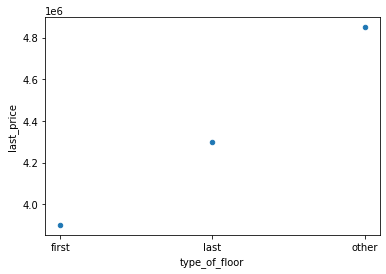

In [33]:
data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median').reset_index().plot.scatter(x='type_of_floor', y='last_price')
plt.show()

<div class="alert alert-block alert-info">
Квартиры дешевле на первом и последнем этаже.

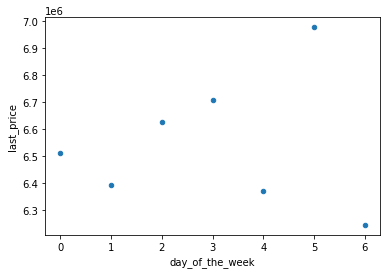

0.0015501452176215405


In [34]:
data.pivot_table(index='day_of_the_week', values='last_price').reset_index().plot.scatter(x='day_of_the_week', y='last_price')
plt.show()
print(data['day_of_the_week'].corr(data['last_price']))

<div class="alert alert-block alert-info">
День публикации объявления никак не влияет на стоимость квартиры.

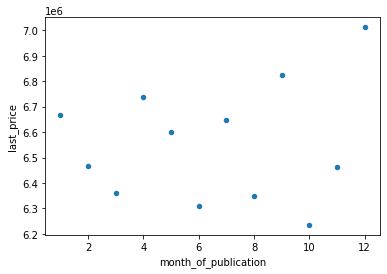

0.0027791287507397166


In [35]:
data.pivot_table(index='month_of_publication', values='last_price').reset_index().plot.scatter(x='month_of_publication', y='last_price')
plt.show()
print(data['month_of_publication'].corr(data['last_price']))

<div class="alert alert-block alert-info">
Месяц публикации объявления никак не влияет на стоимость квартиры.

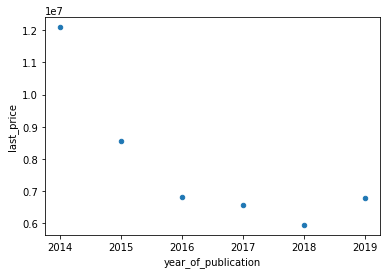

-0.043089036199508615


In [36]:
data.pivot_table(index='year_of_publication', values='last_price').reset_index().plot.scatter(x='year_of_publication', y='last_price')
plt.show()
print(data['year_of_publication'].corr(data['last_price']))

<div class="alert alert-block alert-info">
Год публикации объявления никак не влияет на стоимость квартиры.

<div class="alert alert-block alert-info">
Если рассмотреть динамику цены и площади(общей) продаваемых квартир, то там самая большая корреляция. Т.е. общая площадь оказывает самое большое влияние на стоимость квартиры.

In [37]:
print(data['locality_name'].value_counts().head(10))
print(data.loc[data['locality_name']=='Санкт-Петербург','price_square_meter'].mean())
print(data.loc[data['locality_name']=='посёлок Мурино','price_square_meter'].mean())
print(data.loc[data['locality_name']=='посёлок Шушары','price_square_meter'].mean())
print(data.loc[data['locality_name']=='Всеволожск','price_square_meter'].mean())
print(data.loc[data['locality_name']=='Пушкин','price_square_meter'].mean())
print(data.loc[data['locality_name']=='Колпино','price_square_meter'].mean())
print(data.loc[data['locality_name']=='посёлок Парголово','price_square_meter'].mean())
print(data.loc[data['locality_name']=='Гатчина','price_square_meter'].mean())
print(data.loc[data['locality_name']=='деревня Кудрово','price_square_meter'].mean())
print(data.loc[data['locality_name']=='Выборг','price_square_meter'].mean())

Санкт-Петербург      15721
посёлок Мурино         556
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64
114849.00879387381
85681.76260114639
78677.3642167513
68654.4739860316
103125.81929072196
75424.57909803945
90175.91345801107
68746.14676333922
92473.54757579972
58141.90915331862


In [38]:
data.groupby('locality_name').agg({'locality_name':'count', 'price_square_meter':'median'})

,locality_name,price_square_meter
locality_name,,
Бокситогорск,16,17361.111111
Волосово,36,39906.323185
Волхов,111,35000.000000
Всеволожск,398,65789.473684
Выборг,237,58158.319871
...,...,...
село Путилово,2,39921.758208
село Рождествено,3,35897.435897
село Русско-Высоцкое,9,52060.737527


<div class="alert alert-block alert-info">
Как теперь отсортировать по убыванию количества населённых пунктов?

In [39]:
data.groupby('locality_name').agg({'last_price':'count', 'price_square_meter':'median'}).sort_values(by = 'last_price',ascending=False).head(10)

,last_price,price_square_meter
locality_name,,
Санкт-Петербург,15721,104761.904762
посёлок Мурино,556,85878.462169
посёлок Шушары,440,76876.172608
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
посёлок Парголово,327,91642.857143
Гатчина,307,67796.610169
деревня Кудрово,299,91860.465116


<div class="alert alert-block alert-info">
Самая высокая средняя стоимость 1 квадратного метра в Санкт-Петербурге - 104761.904762 руб.
Самая низкая средняя стоимость 1 квадратного метра в Выборге - 58158.319871 руб.

622670.5881240134


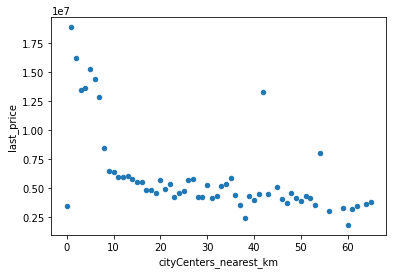

In [40]:
print(data['last_price'].mean()/data['cityCenters_nearest_km'].mean())
data.pivot_table(index='cityCenters_nearest_km', values='last_price').reset_index().plot.scatter(x='cityCenters_nearest_km', y='last_price')
plt.show()

728925.5299476096


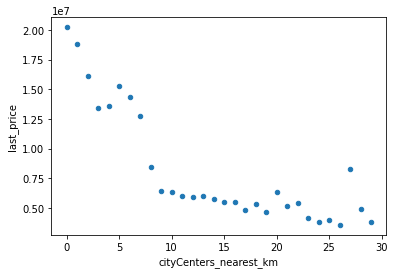

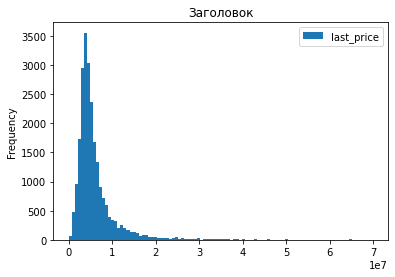

In [41]:
print(data.query('locality_name == "Санкт-Петербург"')['last_price'].mean()/data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest_km'].mean())
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price').reset_index().plot.scatter(x='cityCenters_nearest_km', y='last_price')
plt.show()
data.plot(x="cityCenters_nearest_km", y="last_price", kind='hist', bins=100,range = (0, 70000000), title = 'Заголовок');
plt.show()

<div class="alert alert-block alert-info">
Средняя цена каждого километра до центра составляет 728926 руб. Чем ближе к центру, тем квартиры дороже.

<div class="alert alert-block alert-info">
Промежуточный вывод. Я изучил параметры объектов и унал, как быстро продавались квартиры и какие факторы больше всего влияют на общую стоимость объекта. Посчитал среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Вычислил среднюю цену каждого километра до центра.

### Общий вывод

<div class="alert alert-block alert-info">
Я изучил проект, нашёл пропущенные значения и заменил их там, где это возможно. Также я изменил тип данных некоторых столбцов. Затем я избавился от неявных дубликатов в названиях населённых пунктов и от аномалий. Добавил несколько новых столбцов. Выяснил, что продажи, у которых время размещения объявления менее, чем 1,5 месяца можно считать быстрыми. А продажи, у которых время размещения объявления более 8 месяцев можно считать необычно долгими. Узнал, что на стоимость объекта больше всего влияет общая площадь, т.к. коэффициент корреляции Пирсона состалвляет 0,65. Выяснил, что квартиры дешевле на первом и последнем этажах. Узнал, что самая высокая средняя стоимость 1 м2 в Санкт-Петербурге - 104762 руб. Самая низкая средняя стоимость 1 м2 в Выборге - 58158 руб. И узнал, что в Санкт-Петербурге чем ближе квартиры к центру, тем они дороже за каждый километр на 728926 рублей.
    
---

Рекомендации для бизнеса. Отделу разработчиков. Т.к. в данных много пропущенных значений, то желательно сделать формы для подачи объявлений с обязательными полями для ceiling_height, living_area, kitchen_area.